In [48]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [49]:
# import model vit_minst
import vit_tests

model: tf.keras.Model = tf.keras.models.load_model('./mints10',
                                                custom_objects={
                                                            'MLP': vit_tests.MLP,
                                                            'PatchEncoder': vit_tests.PatchEncoder,
                                                            'Patches': vit_tests.Patches,
                                                            'VisionTransformer': vit_tests.VisionTransformer,
                                                    }
                                                ) # type: ignore

model.summary()

Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 patches_1 (Patches)         multiple                  0         
                                                                 
 patch_encoder_1 (PatchEncod  multiple                 1296      
 er)                                                             
                                                                 
 layer_normalization_5 (Laye  multiple                 32        
 rNormalization)                                                 
                                                                 
 multi_head_attention_2 (Mul  multiple                 8592      
 tiHeadAttention)                                                
                                                                 
 add_4 (Add)                 multiple                  0         
                                                

# Transform 16x16 patch using dense layer?

In [50]:
model.layers

In [51]:
# output shape
[var.name for var in model.layers[2].variables]

['layer_normalization/gamma:0', 'layer_normalization/beta:0']

In [52]:
# check shapes
for var in model.layers[2].variables:
    print(var.name, var.shape)

layer_normalization/gamma:0 (16,)
layer_normalization/beta:0 (16,)


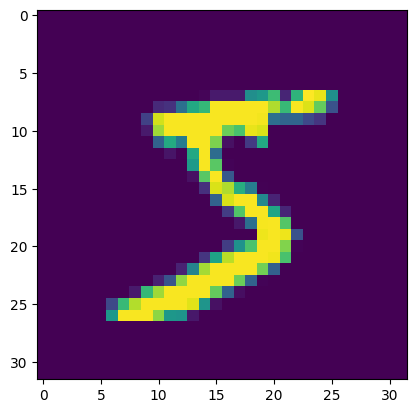

In [53]:
train, test = keras.datasets.mnist.load_data()

x_train, y_train = train

y_train = y_train.astype("float32")

x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)
x_train = x_train.reshape(x_train.shape[0], 1, 32, 32)

x_test, y_test = test

y_test = y_test.astype("float32")

x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), mode='constant', constant_values=0)
x_test = x_test.reshape(x_test.shape[0], 1, 32, 32)

import matplotlib.pyplot as plt

sample = x_train[0].reshape(32, 32)

plt.imshow(sample)

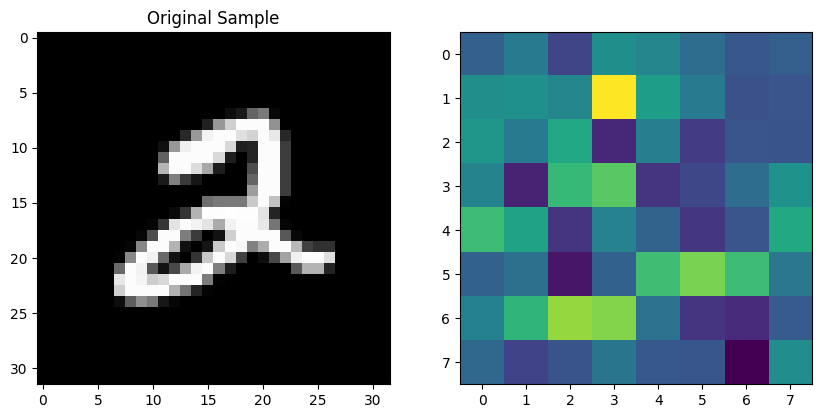

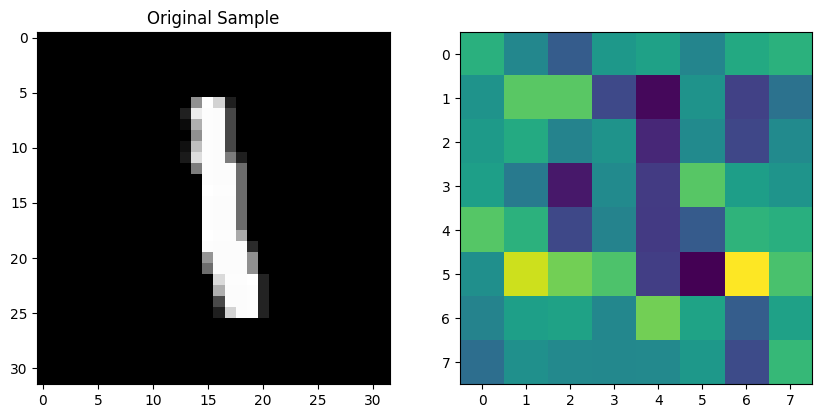

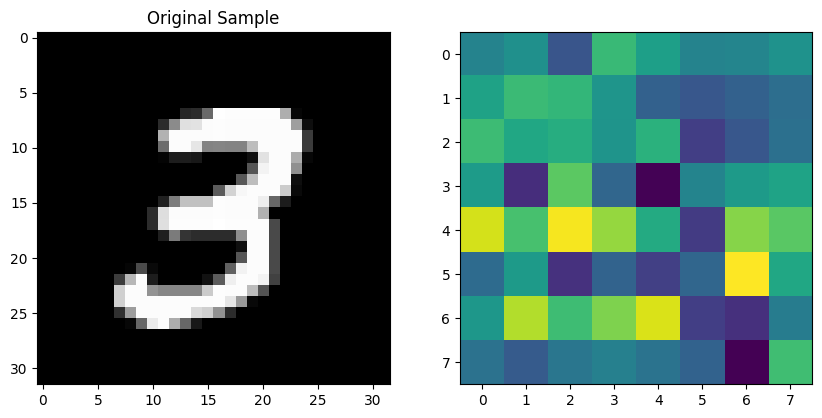

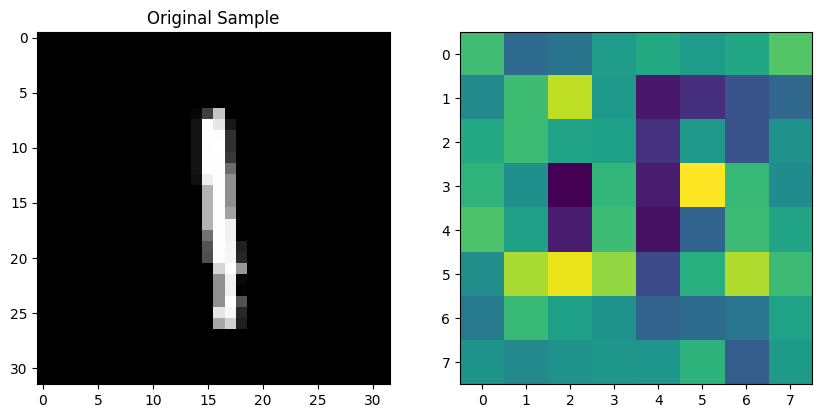

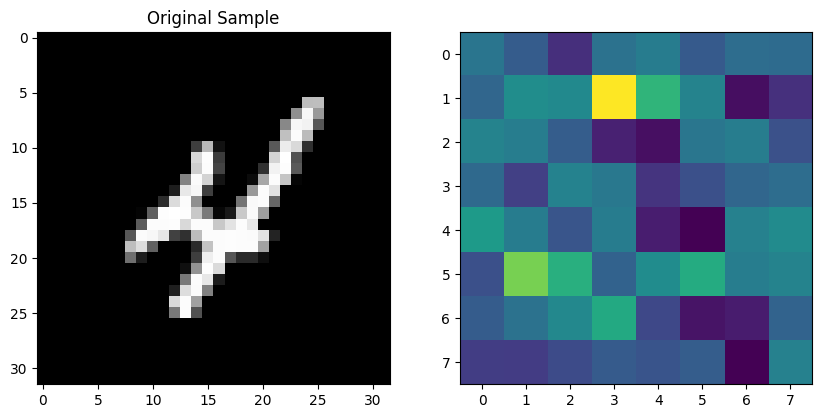

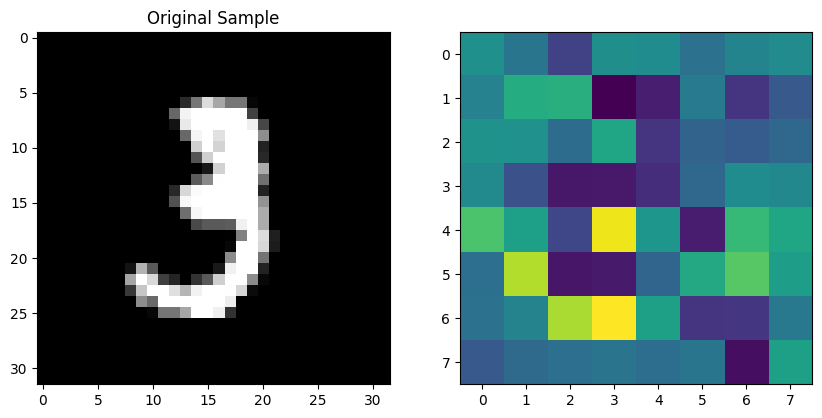

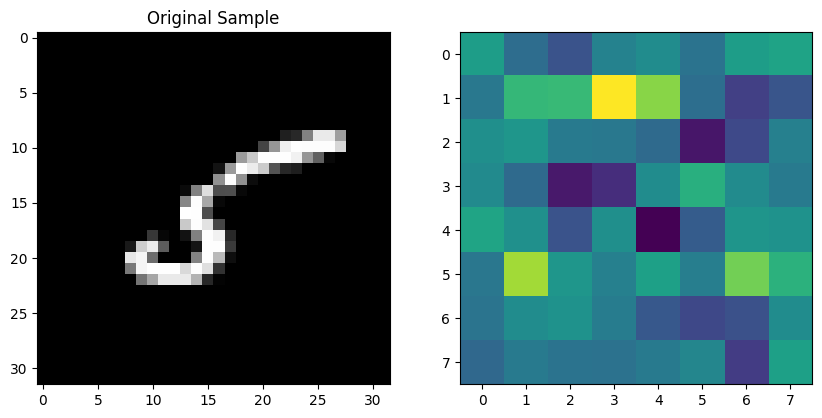

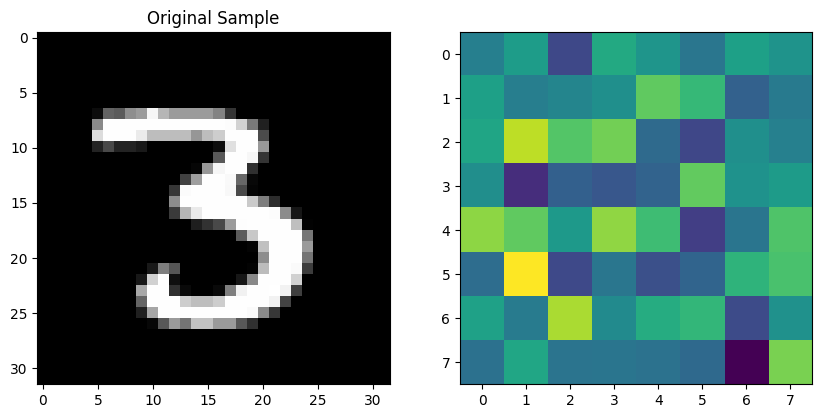

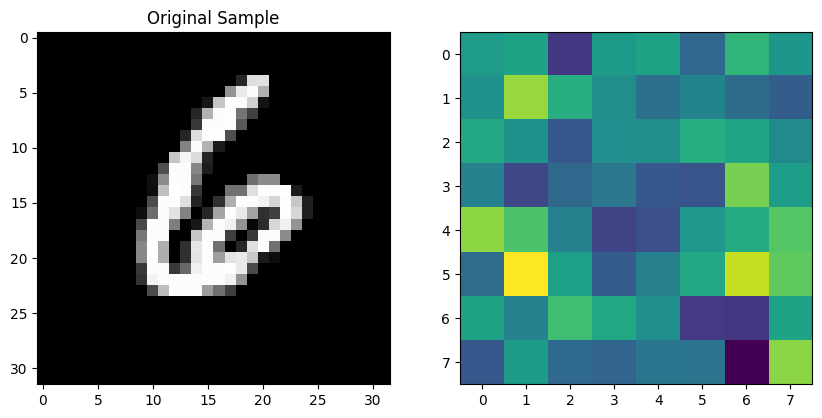

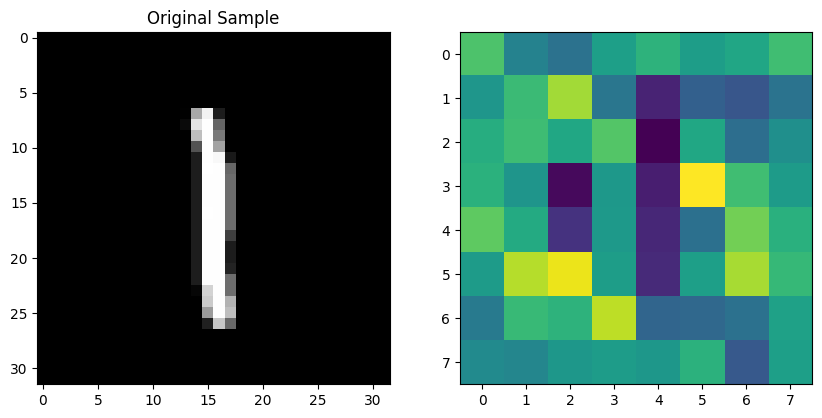

In [56]:
for i in range(5,15):
    sample = x_train[i].reshape(1, 32, 32, 1)

    plt.figure(figsize=(10, 5))

    # First plot: Original sample
    plt.subplot(1, 2, 1)
    plt.imshow(sample.reshape(32, 32, 1), cmap='gray')
    plt.title('Original Sample')

    # Second plot: Attention map
    attentions = model.compute_attention_map(sample).numpy()
    attentions = np.squeeze(attentions)
    # (16, 64, 64) (heads, patches, emb_dim)
    # apply softmax to get probabilities for each patch
    # attentions = tf.nn.softmax(attentions, axis=1)
    attentions = np.mean(attentions, axis=0)
    attentions = np.mean(attentions, axis=0)
    attentions = np.mean(attentions, axis=0)

    # apply softmax to get probabilities for each patch

    plt.subplot(1, 2, 2)
    plt.imshow(attentions.reshape(8, 8))


plt.show()